# Graduate Admission Prediction using Decision Tree

## Step 1: Import Libraries and Load Dataset

In [1]:

import pandas as pd
df = pd.read_csv("Admission_Predict.csv")
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Step 2: Data Preprocessing (Clean column names & convert target)

In [2]:

df.columns = [col.strip() for col in df.columns]
df['Admitted'] = (df['Chance of Admit'] >= 0.5).astype(int)
df[['GRE Score', 'CGPA', 'Admitted']].head()


,GRE Score,CGPA,Admitted
0,337,9.65,1
1,324,8.87,1
2,316,8.00,1
3,322,8.67,1
4,314,8.21,1


## Step 3: Select Features (GRE + CGPA) and Target

In [3]:

X = df[['GRE Score', 'CGPA']]
y = df['Admitted']


## Step 4: Train-Test Split

In [4]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 5: Train Decision Tree

In [5]:

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

## Step 6: Make Predictions

In [6]:

y_pred = model.predict(X_test)


## Step 7: Evaluate Model

In [7]:

from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9
Confusion Matrix:
 [[ 5  5]
 [ 3 67]]


## Step 8: Optional - Visualize Decision Tree

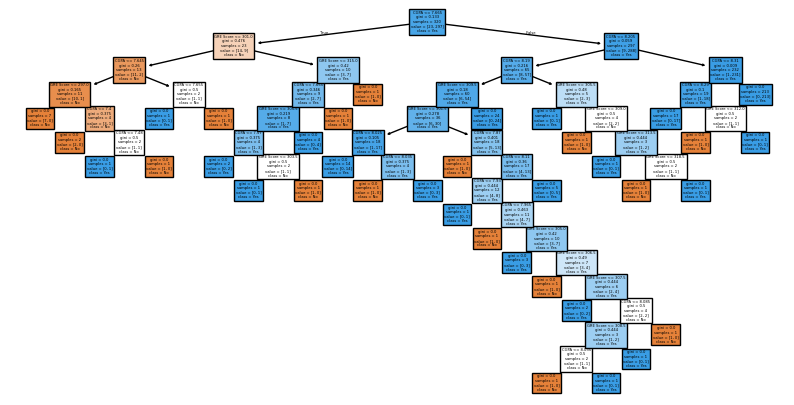

In [8]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plot_tree(model, feature_names=['GRE Score','CGPA'], class_names=['No','Yes'], filled=True)
plt.show()
